In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_excel(r"C:\Users\HP\Desktop\Six igma BB\BB Project\Oil_data.xlsx")
df=pd.DataFrame(data)
df.head()
df.columns

Index(['Well_ID', 'Date', 'Location', 'Depth_m', 'Daily_Production_bbl',
       'Water_Content_%', 'API_Gravity', 'Temperature_C', 'Pressure_Pa',
       'Extraction_Method', 'Operational_Cost_$', 'Downtime%',
       'Equipment_ failures', 'Maintenance_delay_in_hours',
       'Deliverables_count_day_in_Oil_tins', 'Jobs_Accepted_count', 'CFB',
       'Associate_ID'],
      dtype='object')

In [5]:
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Extraction_Method'] = label_encoder.fit_transform(df['Extraction_Method'])
df['Equipment_ failures'] = df['Equipment_ failures'].map({'No Failure': 0, 'Failure': 1})

In [7]:
X = df[['Depth_m', 'Water_Content_%', 'API_Gravity', 'Temperature_C', 'Pressure_Pa',
        'Extraction_Method', 'Operational_Cost_$', 'Downtime%', 'Equipment_ failures', 
        'Maintenance_delay_in_hours', 'Deliverables_count_day_in_Oil_tins', 
        'Jobs_Accepted_count', 'CFB']]
y = df['Daily_Production_bbl']

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [13]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 26240.01532105263
R-squared (R2): 0.07803113779477977


In [21]:
# Feature importance
importances = rf_model.feature_importances_
for i, v in enumerate(importances):
    print(f'Feature: {X.columns[i]}, Importance: {v}')

Feature: Depth_m, Importance: 0.3458644581322901
Feature: Water_Content_%, Importance: 0.00896439660784139
Feature: API_Gravity, Importance: 0.05687032115081843
Feature: Temperature_C, Importance: 0.03309160292813546
Feature: Pressure_Pa, Importance: 0.01144804436861242
Feature: Extraction_Method, Importance: 0.006241012623589705
Feature: Operational_Cost_$, Importance: 0.03258361583898567
Feature: Downtime%, Importance: 0.005924060124959445
Feature: Equipment_ failures, Importance: 0.43276684063655874
Feature: Maintenance_delay_in_hours, Importance: 0.030416646848066095
Feature: Deliverables_count_day_in_Oil_tins, Importance: 0.012900027969721626
Feature: Jobs_Accepted_count, Importance: 0.02042526575563201
Feature: CFB, Importance: 0.0025037070147889526


In [23]:
importances = rf_model.feature_importances_
feature_names = X.columns

In [25]:
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [27]:
# Sort the DataFrame by importance (descending order)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

Text(0, 0.5, 'Features')

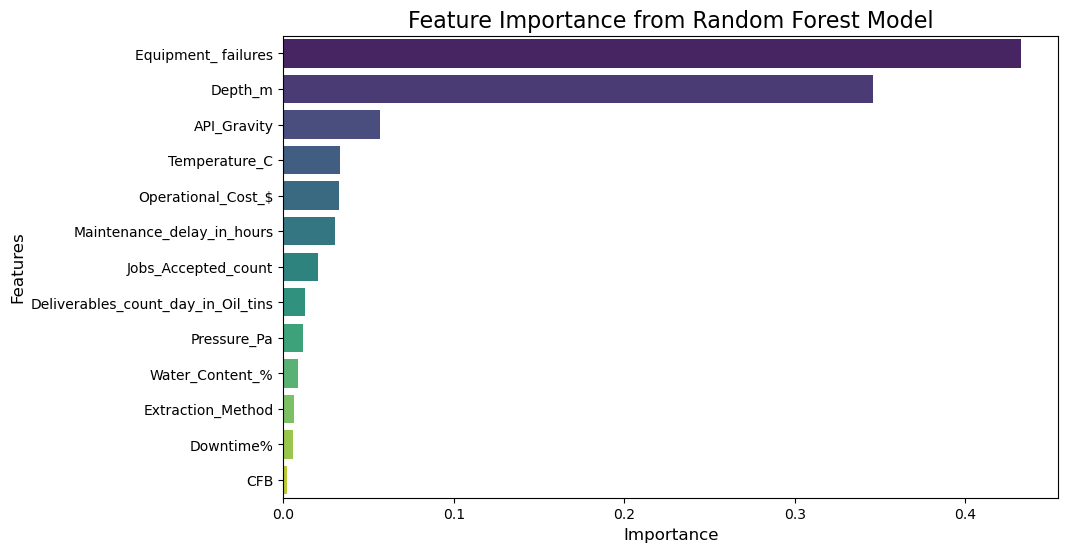

In [29]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)